# Exploration

This notebook loads and explores the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset

In [2]:
filepath = '/Users/vug/Downloads/movie_metadata.csv'
filepath = r'C:\Users\veliu\Downloads\movie_metadata.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
print('There are {} samples with {} features'.format(len(df), df.shape[1]))

There are 5043 samples with 28 features


# Study Features

In [5]:
features_text = sorted(df.dtypes[df.dtypes == 'object'].index.values.tolist())
features_numeric = sorted(set(df.columns) - set(features_text))

In [6]:
print('text features:', features_text)
print()
print('numeric features:', features_numeric)

text features: ['actor_1_name', 'actor_2_name', 'actor_3_name', 'color', 'content_rating', 'country', 'director_name', 'genres', 'language', 'movie_imdb_link', 'movie_title', 'plot_keywords']

numeric features: ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'aspect_ratio', 'budget', 'cast_total_facebook_likes', 'director_facebook_likes', 'duration', 'facenumber_in_poster', 'gross', 'imdb_score', 'movie_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 'title_year']


# plot_keywords

In [24]:
df.plot_keywords.head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

plot_keywords are strings joined with `|` symbol. Let's get the list of all keywords. And store all scores given to a keyword.

In [7]:
a = df.plot_keywords.apply(lambda x: x.split('|') if not type(x) == float else []).values
b = pd.Series(np.hstack(a)).value_counts()
keywords = b.keys()
keyword_scores = {kw: [] for kw in keywords}
for ix, row in df.iterrows():
    if type(row.plot_keywords) == str:
        for kw in row.plot_keywords.split('|'):
            keyword_scores[kw].append(row.imdb_score)

In [22]:
for key in keywords[200:210]:
    print(key, keyword_scores[key])

england [6.7, 7.9, 5.0, 6.4, 6.9, 7.8, 5.8, 5.8, 6.2, 7.4, 8.1, 6.0, 7.5, 7.5, 6.4, 6.9, 7.7, 6.9]
twin [5.6, 4.8, 6.4, 5.4, 5.3, 6.4, 5.4, 4.9, 7.7, 6.0, 4.8, 6.7, 7.3, 7.9, 4.8, 5.3, 7.3]
overalls [5.4, 6.4, 6.1, 6.1, 6.9, 4.2, 3.5, 6.7, 5.6, 6.8, 6.8, 5.8, 6.5, 6.1, 6.8, 6.8, 6.9]
post apocalypse [7.6, 7.2, 8.1, 7.0, 7.1, 6.9, 7.0, 7.1, 6.2, 7.4, 5.6, 6.5, 7.6, 4.3, 6.7, 3.4, 7.0]
1990s [6.7, 4.9, 7.1, 7.3, 6.4, 4.3, 5.3, 6.2, 7.0, 6.9, 7.2, 7.1, 8.5, 7.5, 7.3, 6.3, 5.9]
bare breasts [5.6, 4.6, 6.5, 5.4, 4.8, 6.8, 7.4, 4.7, 4.8, 4.5, 5.2, 7.0, 5.1, 4.2, 4.7, 5.2, 6.0]
male objectification [6.6, 6.6, 5.5, 5.4, 7.4, 6.7, 7.1, 6.6, 5.5, 6.7, 6.2, 6.9, 5.5, 5.7, 6.1, 6.1, 5.8]
vacation [6.6, 5.4, 5.2, 6.3, 6.1, 6.6, 4.0, 7.1, 5.5, 6.7, 7.4, 3.6, 6.5, 6.8, 7.4, 7.6, 2.7]
competition [6.8, 6.3, 5.4, 5.6, 7.0, 6.2, 7.5, 6.3, 7.2, 6.7, 5.2, 5.5, 6.0, 3.5, 2.9, 6.3, 2.5]
halloween [6.6, 6.7, 4.8, 7.9, 7.9, 4.9, 4.1, 5.4, 3.6, 5.2, 4.9, 5.9, 5.9, 5.3, 4.9, 4.6, 7.9]


## Color

In [111]:
df.color.value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

There are only two color values: Color or B&W

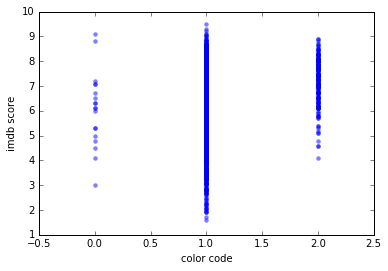

In [31]:
x = df.color.apply(lambda x: 1 if x == 'Color' else 2 if x == ' Black and White' else 0)
y = df.imdb_score
plt.scatter(x, y, lw=0, alpha=0.5)
plt.xlabel('color code')
plt.ylabel('imdb score');

## Actor names

In [27]:
df[['actor_1_name', 'actor_2_name', 'actor_2_name']].head()

,actor_1_name,actor_2_name,actor_2_name
0,CCH Pounder,Joel David Moore,Joel David Moore
1,Johnny Depp,Orlando Bloom,Orlando Bloom
2,Christoph Waltz,Rory Kinnear,Rory Kinnear
3,Tom Hardy,Christian Bale,Christian Bale
4,Doug Walker,Rob Walker,Rob Walker


For each movie we have the names of 3 actors. Let's get the list of all actors in the dataset. And then store the scores earned by each actor.

In [25]:
s1 = set(df.actor_1_name.dropna().unique())
s2 = set(df.actor_2_name.dropna().unique())
s3 = set(df.actor_3_name.dropna().unique())

s = s1 | s2 | s3
actors = sorted(s)
len(actors)

6255

In [28]:
actor_scores = {actor: [] for actor in actors}
for ix, row in df.iterrows():
    for a in [row.actor_1_name, row.actor_2_name, row.actor_3_name]:
        if type(a) == str:
            actor_scores[a].append(row.imdb_score)

In [29]:
actor_scores['Costas Mandylor']

[6.8, 5.5, 6.2, 5.6, 6.0, 5.8, 6.2, 5.9, 6.7]

## Actor Facebook likes

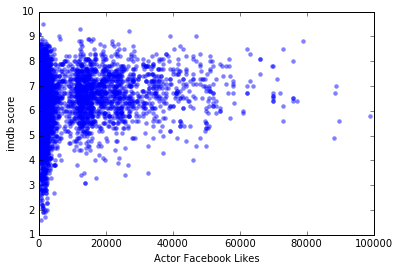

In [32]:
d = df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].copy()
row_mean = d.mean(axis=1)
d.actor_1_facebook_likes.fillna(row_mean, inplace=True)
d.actor_2_facebook_likes.fillna(row_mean, inplace=True)
d.actor_3_facebook_likes.fillna(row_mean, inplace=True)
d.fillna(row_mean.mean(), inplace=True)
plt.scatter(d.sum(axis=1), df.imdb_score, lw=0, alpha=0.5)
plt.xlim([0, 100000])
plt.xlabel('Actor Facebook Likes')
plt.ylabel('imdb score');

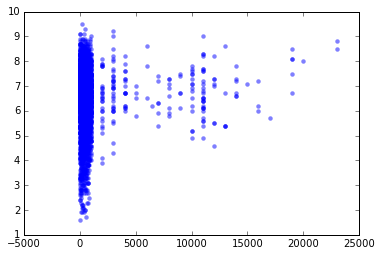

In [200]:
plt.scatter(d.actor_3_facebook_likes, df.imdb_score, lw=0, alpha=0.5)

potential features
- total likes of all actores
- likes of individual actores

## Aspect ratio

I expect aspect ratio to have no effect

In [34]:
# I guess 16 is incorrect. Fix it to 16.6
df.loc[df.aspect_ratio == 16, 'aspect_ratio'] = 1.66

In [35]:
df.aspect_ratio.value_counts()

2.35    2360
1.85    1906
1.78     110
1.66     109
1.37     100
1.33      68
2.20      15
2.39      15
4.00       7
2.00       5
2.76       3
1.75       3
2.40       3
1.50       2
2.55       2
1.20       1
1.77       1
1.18       1
1.44       1
1.89       1
2.24       1
Name: aspect_ratio, dtype: int64

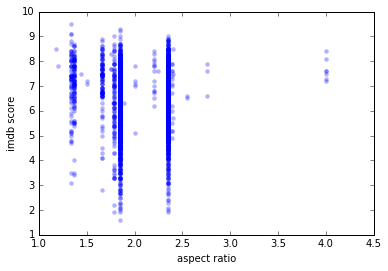

In [36]:
plt.scatter(df.aspect_ratio, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('aspect ratio')
plt.ylabel('imdb score');

## Content rating

In [209]:
df.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

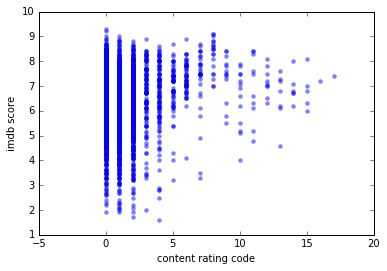

In [37]:
mp = {rat: ix for ix, rat in enumerate(df.content_rating.value_counts().index)}
x = df.content_rating.dropna().apply(lambda rat: mp[rat])
y = df[~df.content_rating.isnull()].imdb_score
plt.scatter(x, y, lw=0, alpha=0.5)
plt.xlabel('content rating code')
plt.ylabel('imdb score');

- content rating can be used via one-hot encoding

## Country

In [227]:
df.country.value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Italy                     23
Japan                     23
Mexico                    17
Hong Kong                 17
New Zealand               15
South Korea               14
Ireland                   12
Russia                    11
Denmark                   11
South Africa               8
Brazil                     8
Norway                     8
Sweden                     6
Netherlands                5
Poland                     5
Thailand                   5
Romania                    4
Argentina                  4
Israel                     4
Iran                       4
Belgium                    4
                        ... 
Hungary                    2
Taiwan                     2
Dominican Republic         1
Panama        

- skip country

## Director

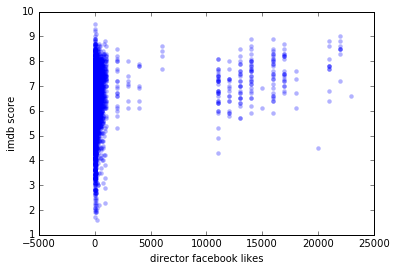

In [38]:
plt.scatter(df.director_facebook_likes, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('director facebook likes')
plt.ylabel('imdb score');

Calculate each score earn by a director

In [40]:
directors = df.director_name.unique()
director_scores = {d: [] for d in directors}
for ix, row in df.iterrows():
    if type(row.director_name) == str:
        director_scores[row.director_name].append(row.imdb_score)

In [43]:
for d in directors[:10]:
    print(d, director_scores[d])

James Cameron [7.9, 7.7, 8.5, 7.2, 7.6, 8.4, 8.1]
Gore Verbinski [7.1, 7.3, 6.5, 7.2, 8.1, 6.1, 6.6]
Sam Mendes [6.8, 7.8, 7.7, 7.1, 7.3, 7.1, 8.4, 7.8]
Christopher Nolan [8.5, 9.0, 8.6, 8.8, 8.3, 7.2, 8.5, 8.5]
Doug Walker [7.1]
Andrew Stanton [6.6, 8.4, 8.2]
Sam Raimi [6.2, 7.3, 6.4, 7.3, 6.5, 6.4, 6.6, 7.5, 7.6, 6.2, 7.8, 6.4, 7.6]
Nathan Greno [7.8]
Joss Whedon [7.5, 8.1, 8.1, 8.0]
David Yates [7.5, 6.6, 7.5, 6.6]


- average director score can be an indicator

## Duration

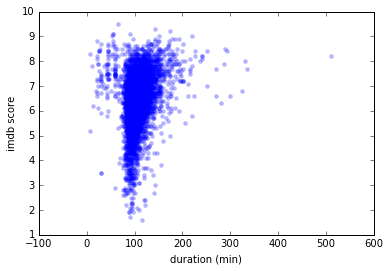

In [44]:
plt.scatter(df.duration, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('duration (min)')
plt.ylabel('imdb score');

## Facenumber

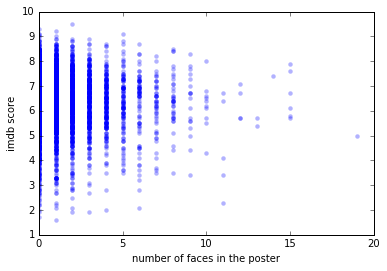

In [45]:
plt.scatter(df.facenumber_in_poster, df.imdb_score, lw=0, alpha=0.3)
plt.xlim([0, 20])
plt.xlabel('number of faces in the poster')
plt.ylabel('imdb score');

## Genres

In [46]:
a = df.genres.apply(lambda x: x.split('|') if not type(x) == float else []).values
b = pd.Series(np.hstack(a)).value_counts()
genres = b.keys()
genre_scores = {g: [] for g in genres}
for ix, row in df.iterrows():
    if type(row.genres) == str:
        for g in row.genres.split('|'):
            genre_scores[g].append(row.imdb_score)

In [47]:
genres

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Fantasy', 'Horror', 'Family', 'Mystery',
       'Biography', 'Animation', 'Music', 'War', 'History', 'Sport', 'Musical',
       'Documentary', 'Western', 'Film-Noir', 'Short', 'News', 'Reality-TV',
       'Game-Show'],
      dtype='object')

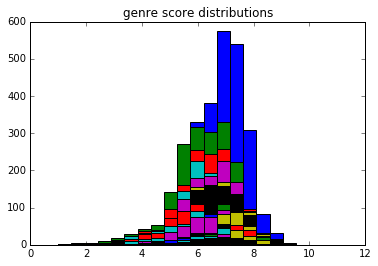

In [49]:
for g in genres:
    plt.hist(genre_scores[g], bins=np.linspace(1,10,20))
plt.title('genre score distributions');

## Gross

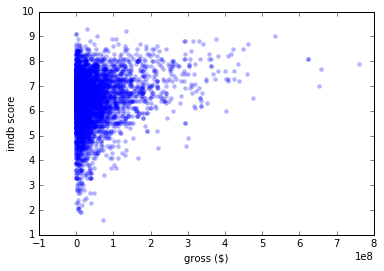

In [50]:
plt.scatter(df.gross, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('gross ($)')
plt.ylabel('imdb score');

## Language

In [274]:
df.language.value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Italian         11
Russian         11
Korean           8
Portuguese       8
Hebrew           5
Swedish          5
Danish           5
Arabic           5
Polish           4
Persian          4
Dutch            4
Norwegian        4
Thai             3
Chinese          3
Dari             2
Zulu             2
None             2
Romanian         2
Indonesian       2
Icelandic        2
Aboriginal       2
Czech            1
Telugu           1
Slovenian        1
Vietnamese       1
Kazakh           1
Bosnian          1
Panjabi          1
Kannada          1
Filipino         1
Maya             1
Mongolian        1
Hungarian        1
Urdu             1
Greek            1
Tamil            1
Swahili          1
Dzongkha         1
Aramaic          1
Name: language, dtype: int64

- not distinctive

## Movie Likes

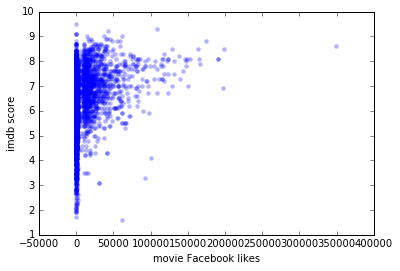

In [51]:
plt.scatter(df.movie_facebook_likes, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('movie Facebook likes')
plt.ylabel('imdb score');

- this is a little bit like cheating. Movie likes are given after the movie has been released.

## Movie title

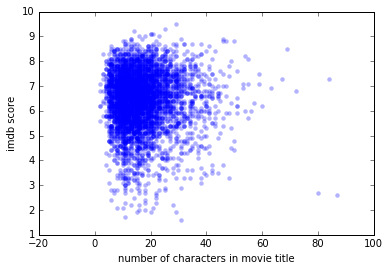

In [55]:
plt.scatter(df.movie_title.apply(lambda title: len(title)), df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('number of characters in movie title')
plt.ylabel('imdb score');

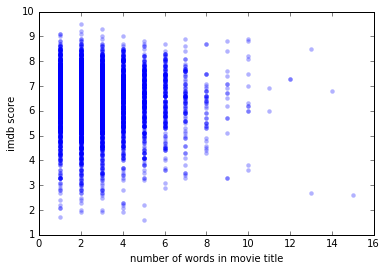

In [54]:
plt.scatter(df.movie_title.apply(lambda title: len(title.split())), df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('number of words in movie title')
plt.ylabel('imdb score');

- I am streching my chances here. Probably I'll introduce some noise with these features.

## num_critic_for_reviews

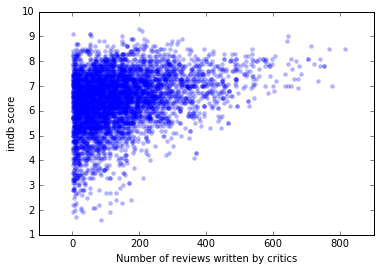

In [56]:
plt.scatter(df.num_critic_for_reviews, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('Number of reviews written by critics')
plt.ylabel('imdb score');

## num_user_for_reviews

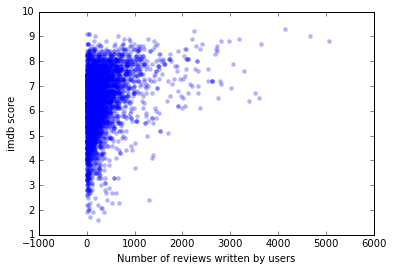

In [57]:
plt.scatter(df.num_user_for_reviews, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('Number of reviews written by users')
plt.ylabel('imdb score');

# num_voted_users

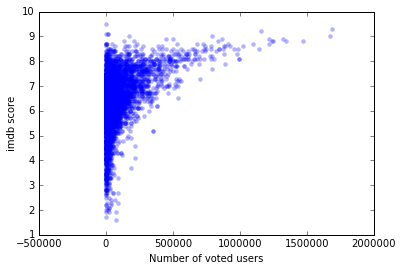

In [58]:
plt.scatter(df.num_voted_users, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('Number of voted users')
plt.ylabel('imdb score');

## Year

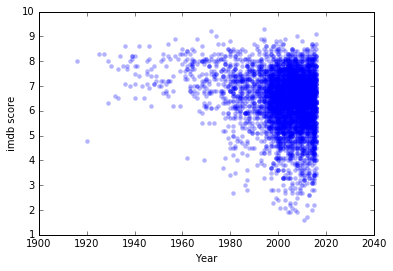

In [59]:
plt.scatter(df.title_year, df.imdb_score, lw=0, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('imdb score');

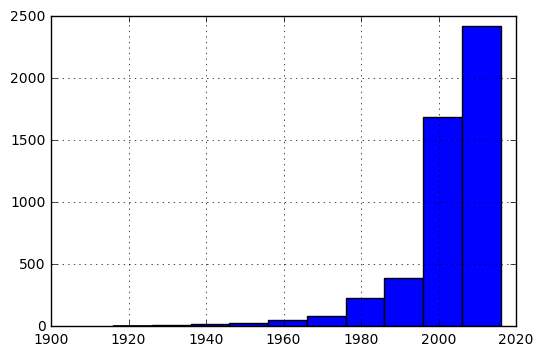

In [12]:
df.title_year.hist()

# Example sample

In [22]:
df.iloc[0].sort_index()

actor_1_facebook_likes                                                    1000
actor_1_name                                                       CCH Pounder
actor_2_facebook_likes                                                     936
actor_2_name                                                  Joel David Moore
actor_3_facebook_likes                                                     855
actor_3_name                                                         Wes Studi
aspect_ratio                                                              1.78
budget                                                                2.37e+08
cast_total_facebook_likes                                                 4834
color                                                                    Color
content_rating                                                           PG-13
country                                                                    USA
director_facebook_likes                             

## Scores

Scores are between 1 and 10. Looks like a normal distribution with a tail towards left.

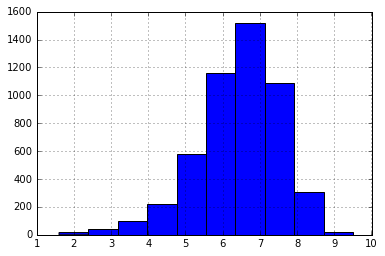

In [115]:
df.imdb_score.hist()

# Commentary

- The biggest problem with this dataset is its sampling bias.
- The data is taken from www.the-numbers.com which has public data about movies. 
- More information is available about more recent movies.
  - Less black and white movies than color movies
  - Less older movies.
  - Nearly all english movies.
  - Also old movies and older actors have less or no Facebook likes
  - movie reviews increase in time